#                              Yelp review dataset analysis

In [49]:
## Importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [50]:
## Modules for Data PreProcessing and text visualization
import nltk
from collections import Counter
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
import string
from textblob import TextBlob
from itertools import islice
from wordcloud import STOPWORDS
from wordcloud import WordCloud

In [51]:
## Importing necessary modelues for Model Building
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [52]:
file='/Users/ankit/Downloads/yelp_dataset/yelp_review_short.csv'

In [53]:
df= pd.read_csv(file)

In [54]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [55]:
df.describe()

,stars,useful,funny,cool
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.716700,1.29820,0.458000,0.559000
std,1.471549,2.90264,1.557973,2.056682
min,1.000000,0.00000,0.000000,0.000000
25%,3.000000,0.00000,0.000000,0.000000
50%,4.000000,0.00000,0.000000,0.000000
75%,5.000000,1.00000,0.000000,0.000000
max,5.000000,91.00000,42.000000,86.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
review_id      10000 non-null object
user_id        10000 non-null object
business_id    10000 non-null object
stars          10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
cool           10000 non-null int64
text           10000 non-null object
date           10000 non-null object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [57]:
df.dropna(inplace=True)

In [58]:
df.count()

review_id      10000
user_id        10000
business_id    10000
stars          10000
useful         10000
funny          10000
cool           10000
text           10000
date           10000
dtype: int64

In [59]:
df['length'] = df['text'].apply(len)


In [60]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


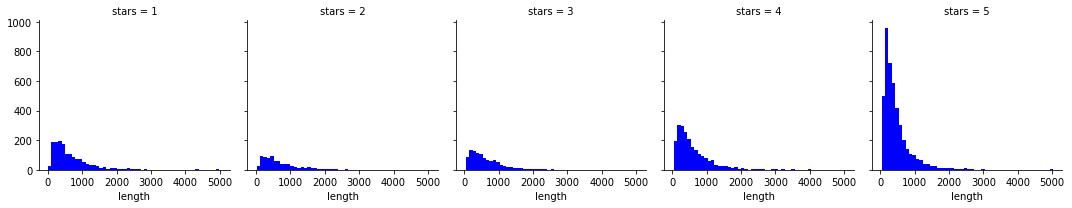

In [61]:
# COMPARING TEXT LENGTH TO STARS
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

We can see the length of reviews was more for 5 stars.

In [62]:
# GETTING THE MEAN VALUES OF THE VOTE COLUMNS WRT THE STARS ON THE REVIEW
stval = df.groupby('stars').mean()
stval

,useful,funny,cool,length
stars,,,,
1,1.901897,0.576848,0.243950,711.079137
2,1.518750,0.655000,0.426250,730.323750
3,1.292523,0.514019,0.609346,681.386916
4,1.332568,0.562701,0.847037,623.055122
5,1.034132,0.316230,0.537975,470.524638


In [63]:
stval.corr()


,useful,funny,cool,length
useful,1.000000,0.711053,-0.657042,0.777206
funny,0.711053,1.000000,-0.166384,0.932967
cool,-0.657042,-0.166384,1.000000,-0.354818
length,0.777206,0.932967,-0.354818,1.000000


Thus, we can see that there is negative correlation between:

* Cool and Useful
* Cool and Funny
* Cool and Length  
Thus, we can say that the reviews marked cool tend to be curt, not very useful to others and short.
Whereas, there is a positive correlation between:

* Funny and Useful    
* Funny and Length
* Useful and Length    
Thus, we can say that longer reviews tend to be funny and useful.

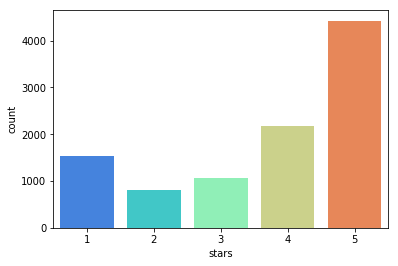

In [64]:
sns.countplot(x='stars',data=df,palette = 'rainbow')


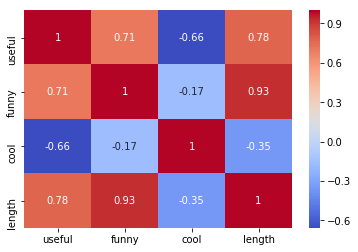

In [65]:
sns.heatmap(stval.corr(),cmap='coolwarm',annot=True)


Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.



In [66]:
yelp_class=df[(df['stars']==1)|(df['stars']==5)]
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509


Set the index with review_id

In [67]:
yelp_class.set_index('review_id')

,user_id,business_id,stars,useful,funny,cool,text,date,length
review_id,,,,,,,,,
Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,204
GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,1567
2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,615
yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,413
11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,3509
8e9HxxLjjqc9ez5ezzN7iQ,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA,1,3,1,1,This place has gone down hill. Clearly they h...,2010-10-05 19:12:35,380
-I5umRTkhw15RqpKMl_o1Q,-mA3-1mN4JIEkqOtdbNXCQ,mRUVMJkUGxrByzMQ2MuOpA,1,0,1,0,"Walked in around 4 on a Friday afternoon, we s...",2017-12-15 23:27:08,434
JVcjMhlavKKn3UIt9p9OXA,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A,1,1,1,0,I cannot believe how things have changed in 3 ...,2012-07-16 00:37:14,968
svK3nBU7Rk8VfGorlrN52A,NJlxGtouq06hhC7sS2ECYw,YvrylyuWgbP90RgMqZQVnQ,5,0,0,0,You can't really find anything wrong with this...,2017-04-07 21:27:49,405


In [92]:
business=df.business_id.unique()

In [93]:
business.shape

(4618,)

So their are total of 4618 bussiness reviewed in the above dataset.

## Sentiment Analysis consists of two parts; Subjectivity and Polarity. Simply, Polarity and Subjectivity can be explained as follows:
Polarity — It simply means emotions expressed in a sentence, across a range of negative, to positive.
Subjectivity — Subjective sentence expresses some personal feelings, views, or beliefs.

In [94]:
COLS = ['date','text', 'sentiment','subjectivity','polarity']
df_new = pd.DataFrame(columns=COLS)


In [95]:
for index, row in islice(df.iterrows(), 0, None):

    new_entry = []
    text_lower=(row['text'].lower())
    blob = TextBlob(text_lower)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    new_entry += [row['date'],text_lower,sentiment,subjectivity,polarity]
    single_survey_sentimet_df = pd.DataFrame([new_entry], columns=COLS)
    df_new = df_new.append(single_survey_sentimet_df, ignore_index=True)
df_new.to_csv('Yelp_Text_Sentiment_Values.csv', mode='w', columns=COLS, index=False, encoding="utf-8")


In [96]:
df_new.shape

(10000, 5)

In [97]:
df_new.head()

,date,text,sentiment,subjectivity,polarity
0,2013-05-07 04:34:36,total bill for this horrible service? over $8g...,"(-0.3333333333333333, 0.6166666666666667)",0.616667,-0.333333
1,2017-01-14 21:30:33,i *adore* travis at the hard rock's new kelly ...,"(0.3158096408096408, 0.5366678366678367)",0.536668,0.315810
2,2016-11-09 20:09:03,i have to say that this office really has it t...,"(0.429125, 0.5840000000000001)",0.584000,0.429125
3,2018-01-09 20:56:38,went in for a lunch. steak sandwich was delici...,"(0.8324999999999999, 0.885)",0.885000,0.832500
4,2018-01-30 23:07:38,today was my second out of three sessions i ha...,"(0.04927662037037037, 0.43240740740740735)",0.432407,0.049277


In [98]:
df_new.describe()

,subjectivity,polarity
count,10000.000000,10000.000000
mean,0.556653,0.237336
std,0.136217,0.231866
min,0.000000,-1.000000
25%,0.479207,0.100106
50%,0.555021,0.238889
75%,0.635556,0.377350
max,1.000000,1.000000


So my program has confirmed to me that all the 10000 records are there and gave me a mean polarity of 0.24, which is good that means as an average, most people are in between neutral to positive with the services.
And as you can see the 50% Value which means the median is above zero i.e., 0.24. 

Text(0, 0.5, 'Range')

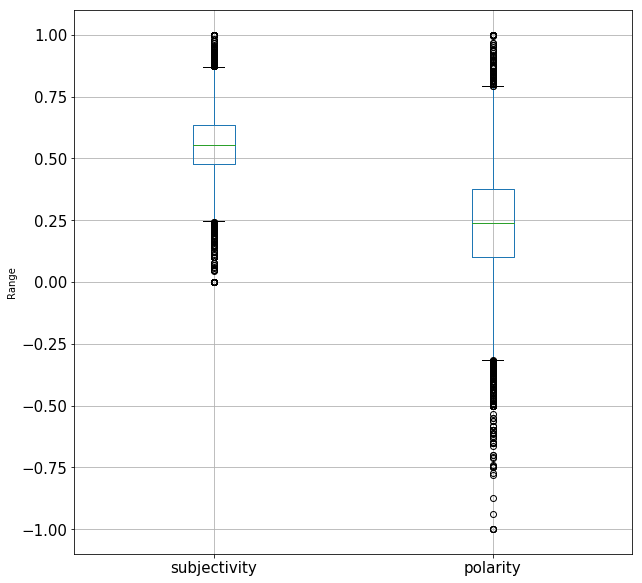

In [99]:
#boxplot for df_new

boxplot = df_new.boxplot(column=['subjectivity','polarity'], 
                     fontsize = 15,grid = True, vert=True,figsize=(10,10,))
plt.ylabel('Range')

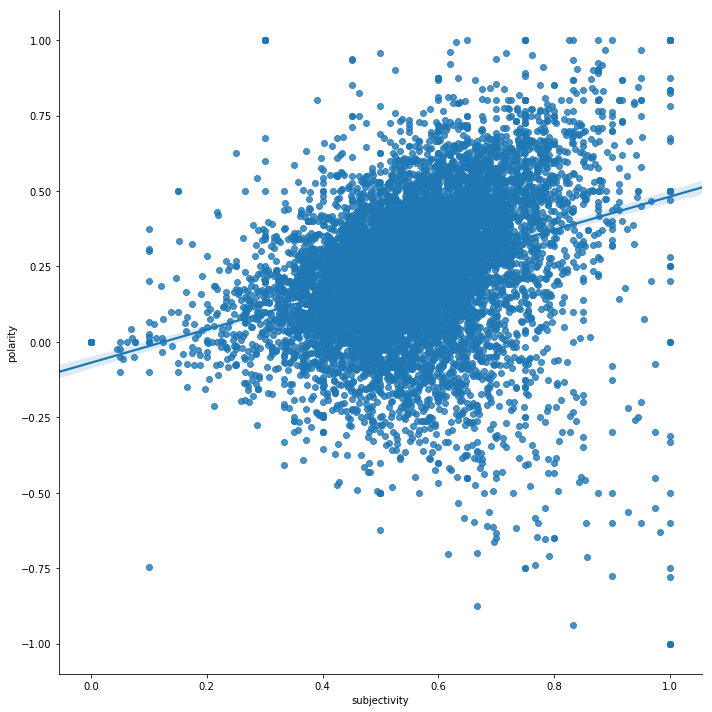

In [100]:
#scatter for dffilter

sns.lmplot(x='subjectivity',y='polarity',data=df_new,fit_reg=True,scatter=True, height=10,palette="mute") 


The scatter diagram is used to find the covariance and correlation between two variables. This diagram helps you determine how closely the two variables are related. After determining the correlation between the variables, you can then predict the behavior of the dependent variable based on the measure of the independent variable.

In [101]:
#covariance and correlation for df_new
# calculate the covariance between two variables

from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr

# prepare data
data1 = df_new['subjectivity']
data2 = data1 + df_new['polarity']
# calculate covariance matrix
covariance = cov(data1, data2) 
print(covariance)

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

[[0.018555   0.02876936]
 [0.02876936 0.09274557]]
Pearsons correlation: 0.69351


The covariance between the two variables is 0.0287693. We can see that it is positive, suggesting the variables change in the same direction as we expect.

We can see that the two variables are positively correlated and that the correlation is 0.69351. This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.

### The plot shows a positive correlation between Subjectivity and Polarity.
Meaning, as subjectivity increase, the polarity in the response increase too, Or in other words, the more strong feelings are expressed, the more the overall comment is subjective.

In [102]:
a=df.text[0]

In [103]:
stopwords_1 = set(STOPWORDS)
stopwords_1.update(["alway","told","us","back","really","great","said","go","way","still","","Total","will","come","much","think","good", "food", "got", "get","came","even","ordered","well","place","one"])

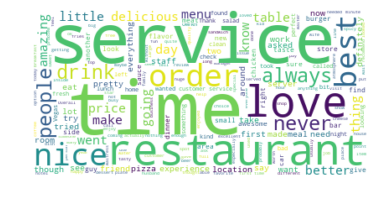

In [104]:
text1="".join(review for review in df.text)
wordcloud=WordCloud(stopwords=stopwords_1,background_color="white").generate(text=text1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

From the above wordcloud we can see that most common theme was Service, Timings, Table service, Drinks more than food,location and in the food section it was pizza and burger.

## Data Preprocessing

In [68]:
#remove html
def remove_html(text):
    soup= BeautifulSoup(text,'lxml')
    htmlfree= soup.gettext()
    return htmlfree

In [69]:
# remove punctuation
def remove_punctuation(text):
    no_punctuation= "".join([w for w in text if w not in string.punctuation])
    return no_punctuation

### Remove punctuation and convert to lower case

In [70]:
yelp_class['text']=yelp_class['text'].apply(lambda x: remove_punctuation(x).lower())

/Users/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
def tokenize(text):
    return text.split()

In [72]:
#yelp_class.text.apply(tokenize)
def remove_stopwords(text):
    text=tokenize(text)
    words= [x for x in text if x not in stopwords.words('english')]
    return " ".join(words)
remove_stopwords("i ador travi at the hard rock new kelli")

'ador travi hard rock new kelli'

In [73]:
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,total bill for this horrible service over 8gs ...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,i adore travis at the hard rocks new kelly car...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,i have to say that this office really has it t...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,went in for a lunch steak sandwich was delicio...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,today was my second out of three sessions i ha...,2018-01-30 23:07:38,3509


#### Now we will perform tokenization for the purpose of stemming and lemmenting

tokenizer= RegexpTokenizer('\w+')st
yelp_class['text']=yelp_class['text'].apply(lambda x :tokenizer.tokenize(x))

In [74]:
import re
def replace_non_english(text):
    token_words=tokenize(text)
    words=[]
    for word in token_words:
        if re.search("[^a-z]", word) is None:
            words.append(word)
    return " ".join(words)
print(replace_non_english("this is 100"))                

this is


In [75]:
# tokenizing using split
lemmatizer= WordNetLemmatizer()


In [76]:
porter= PorterStemmer()

In [77]:
def stemSentence(sentence):
    token_words=tokenize(sentence)
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

In [78]:
stemSentence("horrible service")


'horribl servic'

In [79]:
def lemmatize(sentence):
    token_words=tokenize(sentence)
    tokenized_words = []
    for word in token_words:
        tokenized_words.append(lemmatizer.lemmatize(word))
    return " ".join(tokenized_words)

lemmatize("i am a dogs")

'i am a dog'

In [80]:
yelp_class.text = yelp_class.text.apply(remove_stopwords)

In [81]:
yelp_class.text = yelp_class.text.apply(replace_non_english)


In [82]:
yelp_class.text = yelp_class.text.apply(lemmatize)


In [83]:
yelp_class.text = yelp_class.text.apply(stemSentence)

In [32]:
type(yelp_class.text)

pandas.core.series.Series

In [33]:
yelp_class['text'].head()

0    total bill horribl servic crook actual nerv ch...
1    ador travi hard rock new kelli cardena salon i...
2    say offic realli togeth organ friendli dr j ph...
3    went lunch steak sandwich delici caesar salad ...
4    today second three session paid although first...
Name: text, dtype: object

In [34]:
yelp_class.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,total bill horribl servic crook actual nerv ch...,2013-05-07 04:34:36,204
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,ador travi hard rock new kelli cardena salon i...,2017-01-14 21:30:33,1567
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,say offic realli togeth organ friendli dr j ph...,2016-11-09 20:09:03,615
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,went lunch steak sandwich delici caesar salad ...,2018-01-09 20:56:38,413
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,today second three session paid although first...,2018-01-30 23:07:38,3509


In [86]:
def frequency(sentence):
    token_words=tokenize(sentence)
    tokenized_words = []
    for word in token_words:
        tokenized_words.append(word)
    return (tokenized_words)

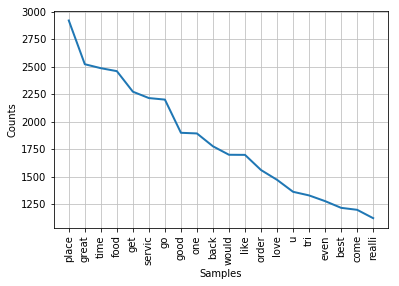

In [92]:
freq_text = yelp_class.text.apply(frequency)
total=[]
for i in freq_text:
    total+=i
freqdist = nltk.FreqDist(total)
freqdist.plot(20,cumulative=False)

In [96]:
freqdist.most_common(20)

[('place', 2921),
 ('great', 2523),
 ('time', 2487),
 ('food', 2460),
 ('get', 2273),
 ('servic', 2215),
 ('go', 2201),
 ('good', 1899),
 ('one', 1893),
 ('back', 1776),
 ('would', 1699),
 ('like', 1698),
 ('order', 1560),
 ('love', 1471),
 ('u', 1362),
 ('tri', 1329),
 ('even', 1277),
 ('best', 1216),
 ('come', 1198),
 ('realli', 1122)]

## Features affecting the positive reviews

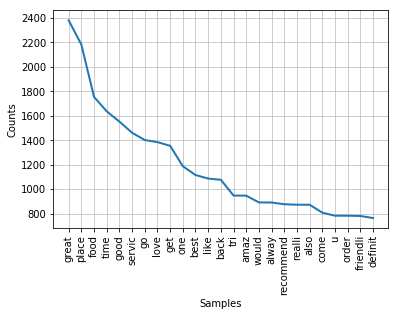

In [107]:
positive_reviews=yelp_class[yelp_class.stars==5]
negative_reviews=yelp_class[yelp_class.stars==1]
positive_freq_text = positive_reviews.text.apply(frequency)

total=[]
for i in positive_freq_text:
    total+=i
freqdist = nltk.FreqDist(total)
freqdist.plot(25,cumulative=False)


## Features affecting the negative reviews

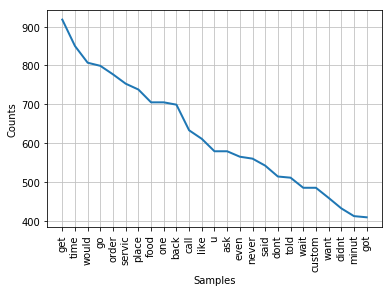

In [106]:
negative_freq_text = negative_reviews.text.apply(frequency)
total=[]
for i in negative_freq_text:
    total+=i
freqdist = nltk.FreqDist(total)
freqdist.plot(25,cumulative=False)

## CountVectorizer for text classification


In order to train our model we need to assign numbers to our words which are present in the reviews.Their are many ways to do this:

Bag of words: but that would be inefficient, all words have same importance, no semantic information is preserved.

Countervector: It can be used here as it counts the number of words used and the number of features depends on it. This converts our text features into numbers which helps in the model preparation.

Tfidf: Uncommon words are given more importance than the common words.

As countervector gives a discrete value of number of counts so multinomialNB should perform better for this counter.


In [122]:

# Create a series to store the labels: y
y = yelp_class.stars

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(yelp_class["text"],y,test_size=0.33,random_state=53)


In [123]:

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(max_df=0.5)

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['aaa', 'aargosi', 'aaron', 'aback', 'abandon', 'abbey', 'abbi', 'abd', 'abel', 'abid']


In [149]:
cv1=CountVectorizer()
text=["The fox is the not fox","The dog","The fox"]
x_train= cv1.fit_transform(text)
x=cv1.vocabulary_
for w, y in (x.items()):
    print(w, y)
len(x)    

the 4
fox 1
is 2
not 3
dog 0


5

In [150]:
print(len(count_vectorizer.vocabulary_))

12440


In [151]:
x=count_vectorizer.vocabulary_
type(x)
x

{'kristin': 5983,
 'knowledg': 5957,
 'work': 12247,
 'satisfi': 9410,
 'servic': 9628,
 'would': 12267,
 'recommend': 8862,
 'line': 6241,
 'schedul': 9469,
 'great': 4667,
 'ye': 12336,
 'chino': 1939,
 'god': 4550,
 'chines': 1935,
 'mexico': 6787,
 'caribbean': 1646,
 'fusion': 4351,
 'answer': 404,
 'plea': 8245,
 'know': 5956,
 'love': 6386,
 'frequent': 4251,
 'sinc': 9894,
 'forev': 4170,
 'front': 4288,
 'tin': 11119,
 'delici': 2831,
 'fill': 3965,
 'brim': 1327,
 'extra': 3765,
 'snickerdoodl': 10066,
 'im': 5331,
 'sport': 10297,
 'gigant': 4484,
 'grin': 4708,
 'caus': 1726,
 'sort': 10177,
 'food': 4136,
 'euphoria': 3635,
 'what': 12105,
 'import': 5349,
 'old': 7551,
 'back': 735,
 'insid': 5478,
 'that': 10966,
 'count': 2435,
 'right': 9142,
 'greet': 4689,
 'friendli': 4270,
 'girl': 4497,
 'offer': 7509,
 'help': 5003,
 'order': 7640,
 'sever': 9655,
 'peopl': 8018,
 'smile': 10029,
 'look': 6344,
 'like': 6222,
 'enjoy': 3544,
 'bustl': 1480,
 'sunday': 10614,
 'ni

In [154]:
for y in sorted(x.values()):
    print(y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803
2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982


5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949
5950
5951
5952
5953
5954
5955
5956
5957
5958
5959
5960
5961
5962
5963
5964
5965
5966
5967
5968
5969
5970
5971
5972
5973
5974
5975
5976
5977
5978
5979
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059


8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960


11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
1184

## TfidfVectorizer for text classification


Bernoulli NB is good for making prediction if the features are in a binary form.
Gaussian NB is good if the features are normally distributed.

As many of the common words like "are", "the" etc dominate our model hence we can use tfidf vectorizer which stands for Term frequency inverse document frequency.

Tfidf= Term Frequency* Inverse Document Frequency
where, term frequency= number of occurence of the word in the document/ number of words in the document
       inverse document frequency= log(no. of documents/no. of documents containing the words)

In [48]:

tf= TfidfVectorizer(max_df=0.5)
tf_train=tf.fit_transform(X_train)
tf_test= tf.transform(X_test)

In [49]:

# Print the first 10 features
print(tf.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tf_train.A[50:5])

['aaa', 'aargosi', 'aaron', 'aback', 'abandon', 'abbey', 'abbi', 'abd', 'abel', 'abid']
[]


In [50]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [51]:
tfidf_df = pd.DataFrame(tf_train.A, columns=tf.get_feature_names())

In [52]:
# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


   aaa  aargosi  aaron  aback  abandon  abbey  abbi  abd  abel  abid  ...  \
0    0        0      0      0        0      0     0    0     0     0  ...   
1    0        0      0      0        0      0     0    0     0     0  ...   
2    0        0      0      0        0      0     0    0     0     0  ...   
3    0        0      0      0        0      0     0    0     0     0  ...   
4    0        0      0      0        0      0     0    0     0     0  ...   

   zipp  zipster  ziti  zoe  zoey  zomg  zone  zoo  zucchini  zupa  
0     0        0     0    0     0     0     0    0         0     0  
1     0        0     0    0     0     0     0    0         0     0  
2     0        0     0    0     0     0     0    0         0     0  
3     0        0     0    0     0     0     0    0         0     0  
4     0        0     0    0     0     0     0    0         0     0  

[5 rows x 12440 columns]
   aaa  aargosi  aaron  aback  abandon  abbey  abbi  abd  abel  abid  ...  \
0  0.0      0.0    0

## Training and testing a classification model with scikit-learn


In [53]:

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


0.9318066157760814
[[ 427   79]
 [  55 1404]]


### TfidfVectorizer

In [59]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

nb_classifier_1 = MultinomialNB()
br_classifier = BernoulliNB()

nb_classifier_1.fit(tf_train, y_train)
gb_classifier.fit(tf_train.toarray(),y_train)
# Create the predicted tags: pred
pred_1 = nb_classifier_1.predict(tf_test)
pred_3= gb_classifier.predict(tf_test.toarray())
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred_1)
print("The accuracy score using MultinomialNB with tfidf:"+ str(score))
score_gb=metrics.accuracy_score(y_test,pred_3)
print("The accuracy score using BernoulliNB with tfidf:"+ str(score_gb))
#Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_1)
print("The confusion matrix using MultinomialNB with tfidf:")
print(cm)


The accuracy score using MultinomialNB with tfidf:0.7786259541984732
The accuracy score using BernoulliNB with tfidf:0.6508905852417303
The confusion matrix using MultinomialNB with tfidf:
[[  72  434]
 [   1 1458]]


We see that the accuracy reduced as tfidf reduces the unwanted features which are not important for model building.

In [61]:
alphas = np.arange(0, 1, .1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tf_train, y_train)
    pred = nb_classifier.predict(tf_test)
    score = metrics.accuracy_score(y_test, pred)
    return score

for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  0.8631043256997456

Alpha:  0.1
Score:  0.9251908396946565

Alpha:  0.2
Score:  0.9089058524173028

Alpha:  0.30000000000000004
Score:  0.8941475826972011

Alpha:  0.4
Score:  0.8804071246819338

Alpha:  0.5
Score:  0.8549618320610687

Alpha:  0.6000000000000001
Score:  0.8381679389312977

Alpha:  0.7000000000000001
Score:  0.8208651399491094

Alpha:  0.8
Score:  0.8045801526717558

Alpha:  0.9
Score:  0.7913486005089059



/Users/ankit/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('tfidf',TfidfVectorizer()),
                     ('sgd',SGDClassifier())])
params = {'tfidf__use_idf':(False,True)}
gridsearch = GridSearchCV(pipeline,params)
gridsearch.fit(X_train,y_train)
print(gridsearch.best_params_)

/Users/ankit/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'tfidf__use_idf': False}


## We got the best accuracy at alpha=0.1

### N gram Vectorization

N grams are continous sequences of n-items in a sentence. N can be 1,2, or any positive number. Using this medthod the model can store more context.

In [68]:
#bigrams
cv_n = CountVectorizer(ngram_range=(1,2)) # (1,2) will use both 1 and 2 

In [69]:
# Transform the training data using only the 'text' column values: count_train 
bigram_train = cv_n.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
bigram_test = cv_n.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(cv_n.get_feature_names()[:10])

['aaa', 'aaa fantast', 'aaa insur', 'aaa took', 'aaa updat', 'aaa went', 'aargosi', 'aargosi owner', 'aaron', 'aaron abl']


In [70]:
bigram_df = pd.DataFrame(bigram_train.A, columns=cv_n.get_feature_names())
print(bigram_df.head())

   aaa  aaa fantast  aaa insur  aaa took  aaa updat  aaa went  aargosi  \
0    0            0          0         0          0         0        0   
1    0            0          0         0          0         0        0   
2    0            0          0         0          0         0        0   
3    0            0          0         0          0         0        0   
4    0            0          0         0          0         0        0   

   aargosi owner  aaron  aaron abl  ...  zoo like  zoo pet  zoo test  \
0              0      0          0  ...         0        0         0   
1              0      0          0  ...         0        0         0   
2              0      0          0  ...         0        0         0   
3              0      0          0  ...         0        0         0   
4              0      0          0  ...         0        0         0   

   zucchini  zucchini ad  zucchini asparagu  zucchini chip  zucchini flower  \
0         0            0                  0

In [71]:
nb_classifier_2= MultinomialNB(alpha=0.1)
nb_classifier_2.fit(bigram_train, y_train)

# Create the predicted tags: pred
pred_2 = nb_classifier_2.predict(bigram_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred_2)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred_2)
print(cm)


0.9475826972010178
[[ 436   70]
 [  33 1426]]


In [72]:
print(nb_classifier_2.predict(cv_n("I loved the food")))

TypeError: 'CountVectorizer' object is not callable

The accuracy using bigrams comes to 94.7%

### Word embedding

Word embedding is a language modelling technique used for mapping words to vectors . Like one food gets related to other food items.

It uses the idea of context, which means vectors of completely unrelated words should be far from other. 
Like, difference between vectors for male and female should be closer to difference between male employeeand female employee in a firm.

Word2vec(model made by google), 
Co-occurence matrix(decomposition of large marix into smaller ones- glove method(log of co-occurence matrix))

It preserves syntactical meaning of the text. 
Every word has a vector, we assign one hot vector initially where only one bit in a vector is 1. Then we take a window size and iterate hroughout our document. When we do this 2 words come into picture:
CBOW and Skipgram

In [ ]:
!pip install --upgrade gensim



In [199]:
import gensim
import gensim.models.word2vec as w2v


In [200]:

import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [201]:
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging

seed = 1
reviews2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)
reviews2vec.build_vocab(yelp_class['text'].apply(lambda x :tokenizer.tokenize(x)))
print("Word2Vec vocabulary length:", len(reviews2vec.wv.vocab))

Word2Vec vocabulary length: 6408


In [202]:
import sklearn.manifold


In [203]:
sentences=yelp_class['text'].apply(lambda x :tokenizer.tokenize(x))
#total_example=reviews2vec.wv.vocab
reviews2vec.train(sentences,epochs=10,total_examples=reviews2vec.corpus_count)

tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)
all_word_vectors_matrix = reviews2vec.wv.syn0

all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

/Users/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [204]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[reviews2vec.wv.vocab[word].index])
            for word in reviews2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"])

In [205]:
points.head(10)


,word,x,y
0,total,-26.302122,-24.422993
1,bill,-50.700111,-8.140308
2,for,-24.279978,-21.211676
3,thi,5.232398,-5.341033
4,horribl,-3.415853,-13.690668
5,servic,1.973171,29.955378
6,over,-28.693535,-10.569721
7,these,-2.334032,8.367343
8,crook,-23.926537,1.121246
9,actual,-18.841124,5.529508
